Título: Manipulación de datos con R - Módulo IV (Exploración de datos y Estadística descriptiva)

Autor(es): Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

Fecha: 2025-06

Institución: Universidad de La Rioja

# Estadística Descriptiva

La estadística descriptiva se encarga de recolectar, organizar, representar y resumir la información contenida en un conjunto de datos. Su objetivo es **describir las características fundamentales** de una o más variables, sin llegar a realizar inferencias o generalizaciones.

---

## Clasificación de las variables

| Tipo de variable     | Subtipo              | Ejemplo                            |
|----------------------|----------------------|------------------------------------|
| **Cualitativa**      | Nominal              | Sexo (masculino/femenino)         |
|                      | Ordinal              | Nivel educativo (bajo/medio/alto) |
| **Cuantitativa**     | Discreta             | Número de hijos (0, 1, 2…)         |
|                      | Continua             | Edad, ingreso mensual, peso       |

---

### Enfoque de análisis:

| Enfoque           | Descripción |
|-------------------|-------------|
| **Univariado**    | Análisis de una sola variable. Se explora su distribución, tendencia central, dispersión y forma. |
| **Bivariado**     | Análisis conjunto de dos variables para identificar relaciones o asociaciones. |
| *(Multivariado)*  | Análisis simultáneo de tres o más variables (fuera del alcance de esta sección). |

---

## Estadística Descriptiva Univariada

1. Para Variables **Cualitativas**:

Se resumen usando tablas de frecuencia:

- **Frecuencia absoluta**: número de observaciones por categoría.
- **Frecuencia relativa**: proporción (o porcentaje) respecto al total.
- **Representaciones gráficas**: gráfico de barras, gráfico de torta.

2. Para Variables **Cuantitativas**:

Se utilizan:

- **Medidas de tendencia central**: media, mediana, moda.
- **Medidas de dispersión**: rango, varianza, desviación estándar, coeficiente de variación.
- **Medidas de forma**: asimetría (skewness), curtosis (kurtosis).
- **Visualizaciones**: histogramas, diagramas de caja (boxplots), Q-Q plots.

---

## Estadística Descriptiva Bivariada

1. Dos Variables cualitativas:
- Tablas de contingencia
- Gráficos de mosaico o de barras agrupadas
- Medidas de asociación (por ejemplo, prueba Chi²)

2. Una Variable Cualitativa y una Cuantitativa:
- Promedios o medianas por grupo
- Boxplots por categoría
- ANOVA exploratoria

3. Dos Variables Cuantitativas:
- Nube de puntos (scatterplot)
- Coeficiente de correlación (Pearson, Spearman)
- Covarianza
- Recta de regresión simple

---



In [1]:
# @title Librerías
# Paquetes necesarios

# Función para instalar si no está instalado
instalar_si_no <- function(paquete) {
    if (!requireNamespace(paquete, quietly = TRUE)) {
    install.packages(paquete, repos = "https://cloud.r-project.org")
  }
  library(paquete, character.only = TRUE)
}

# Lista de paquetes a verificar
paquetes <- c("mlbench","forcats","VIM","knitr","e1071","tidyr","dplyr","ggplot2","e1071", "visdat","reshape2", "janitor")


# Instalar y cargar todos
invisible(lapply(paquetes, instalar_si_no))

# Instalar librería empire
remotes::install_github("davidbiol/empire")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘colorspace’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, set

iterators (NA -> 1.0.14 ) [CRAN]
shape     (NA -> 1.4.6.1) [CRAN]
foreach   (NA -> 1.5.2  ) [CRAN]
glmnet    (NA -> 4.1-9  ) [CRAN]


Installing 4 packages: iterators, shape, foreach, glmnet

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpTb7rUr/remotes11763d02ec/davidbiol-empire-af6dc96/DESCRIPTION’ ... OK
* preparing ‘empire’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘empire_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Datos

Utilizaremos nuevamente el conjunto Sleep de la librería VIM trabajado durante el módulo II.



In [2]:
# Cargar dataset 'sleep'
data("sleep")
sleep

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


## Análisis univariado:


### Medidas de Tendencia Central, posición y coeficiente de variación:

Utilizaremos la función summarise de dplyr para encontrar las medidas de tendencia central y de posición de la variable **BodyWgt**, que no tiene datos faltantes:



In [3]:
# Solo seleccionamos variables numéricas y eliminamos NAs (aunque de antemanos sabemos que no tiene NAs)

sleep_limpio_BodyWgt <- sleep %>%
  select_if(is.numeric)%>%
  filter(!is.na(BodyWgt))

In [5]:
View(sleep_limpio_BodyWgt)

BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
0.920,5.7,NA,NA,16.5,NA,25,5,2,3
2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


In [18]:
# Calcular resumen estadístico de la variable BodyWgt
tabla_resultados1<-sleep_limpio_BodyWgt%>%
  summarise(

  media = mean(BodyWgt),
  mediana = median(BodyWgt),

  varianza = var(BodyWgt),
  desviacion = sd(BodyWgt),
  minimo = min(BodyWgt),
  maximo = max(BodyWgt),
  rango = maximo - minimo,

  CV = (desviacion/media)*100,

  iqr = IQR(BodyWgt),
  q1 = quantile(BodyWgt, 0.25),
  q3 = quantile(BodyWgt, 0.75),
  p90 = quantile(BodyWgt, 0.90),
  LI=q1 - 1.5*iqr,
  LS= q3 + 1.5*iqr,

  total=n(),
  outliers= sum(BodyWgt<LI | BodyWgt > LS),
  proporcion_outliers = (outliers/total),

  asimetria= skewness(BodyWgt),
  curtosis=kurtosis(BodyWgt)
  )%>%
    pivot_longer(
      cols=everything(),
      names_to = "Estadístico",
      values_to = "Valor"
    )%>%
      mutate(
      Valor = format(round(Valor,2), scientific = F)
      )

  tabla_resultados1


Estadístico,Valor
<chr>,<chr>
media,198.79
mediana,3.34
varianza,808485.13
desviacion,899.16
minimo,0.00
maximo,6654.00
rango,6654.00
CV,452.32
iqr,47.60


In [19]:
# Calcular moda con count y slice_max
sleep_limpio_BodyWgt%>%
  count(BodyWgt) %>%
  arrange(desc(n))%>%
  slice(1)


BodyWgt,n
<dbl>,<int>
0.023,2


¿Qué nos dicen estos valores?:

| Estadístico                     | Valor      | Interpretación                                                                                                                          |
| ------------------------------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **media**                       | 198.79     | El peso promedio es muy alto, pero está distorsionado por valores extremos (como elefantes o ballenas).                                 |
| **mediana**                     | 3.34       | El valor central realista: la mitad de los animales pesa menos de 3.34 kg. Mucho menor que la media → **asimetría positiva**.           |
| **varianza**                    | 808485.13  | Muestra una altísima dispersión de los pesos. Valores grandes como 6654 lo elevan fuertemente.                                          |
| **desviación típica**           | 899.16     | Indica gran dispersión respecto a la media. Al igual que la varianza, está **muy afectada por los valores extremos**.                   |
| **mínimo**                      | 0.00       | Existen animales extremadamente ligeros (posiblemente error de redondeo o especie muy pequeña).                                         |
| **máximo**                      | 6654.00    | Hay especies con más de 6 toneladas de peso. Confirma la existencia de outliers muy altos.                                              |
| **rango**                       | 6654.00    | Es la diferencia entre el máximo y el mínimo. Muy alto → **alta variabilidad global**.                                                  |
| **IQR (rango intercuartílico)** | 47.60      | El 50% central de los datos está entre 0.6 y 48.2 kg. Mucho más representativo que el rango total.                                      |
| **Q1**                          | 0.60       | El 25% de los animales pesa menos de 0.6 kg.                                                                                            |
| **Q3**                          | 48.20      | El 75% pesa menos de 48.2 kg.                                                                                                           |
| **P10**                         | 0.08       | El 10% de los animales pesa menos de 80 gramos.                                                                                         |
| **P90**                         | 205.50     | El 90% pesa menos de 205.5 kg.                                                                                                          |
| **P95**                         | 518.20     | El 95% pesa menos de 518.2 kg.                                                                                                          |
| **LI (límite inferior)**        | -70.80     | No se usa aquí porque ningún peso puede ser negativo.                                                                                   |
| **LS (límite superior)**        | 119.61     | Todo valor mayor que este es considerado outlier según el criterio de 1.5 \* IQR.                                                       |
| **total**                       | 62.00      | Se analizaron 62 observaciones con datos completos para `BodyWgt`.                                                                      |
| **outliers**                    | 10.00      | Hay 10 valores considerados **atípicos**.                                                                                               |
| **proporción de outliers**      | 0.16 (16%) | Es **una proporción elevada**: casi 1 de cada 6 observaciones es un outlier.                                                            |
| **asimetría**                   | 6.25       | Muy por encima de 0 → **fuerte asimetría positiva**. Hay una larga cola hacia la derecha.                                               |
| **curtosis**                    | 40.60      | Muy superior a 3 → distribución **leptocúrtica**: concentrada alrededor de la mediana, con colas muy pesadas (muchos valores extremos). |
| **Coeficiente de variación**| 452.32%|La desviación típica es más de 4 veces la media.|


Validación gráfica:

Warning message in geom_histogram(bin = 30, fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


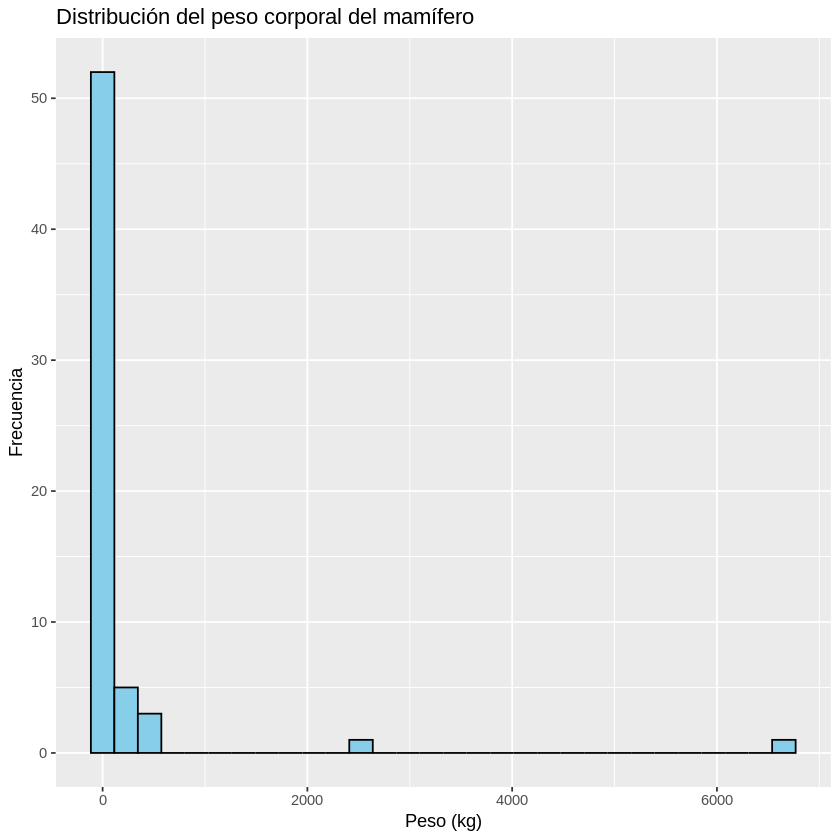

In [24]:
#Diagrama de barras de la variable BodyWht
ggplot(sleep_limpio_BodyWgt,aes(BodyWgt))+
  geom_histogram(bin=30,fill="skyblue",color="black")+
  labs(title="Distribución del peso corporal del mamífero",
x="Peso (kg)",
y="Frecuencia")

In [ ]:
#Boxplot de la bariable BodyWgt
ggplot(sleep_limpio_BodyWgt,aes(y=BodyWgt))+
  geom_(bin=30,fill="skyblue",color="black")+
  labs(title="Distribución del peso corporal del mamífero",
x="Peso (kg)",
y="Frecuencia")

In [47]:
#Boxplot sin valores extremos y modificando los límites del eje
ggplot(sleep_limpio_BodyWgt,aes(y=BodyWgt))+
  geom_boxplot(fill="lightgreen",outlier.shape=NA)+
  labs(title="Boxplot del peso corporal",
y="Peso (kg)",
ylim=(0, 0.7))

ERROR: Error in parse(text = input): <text>:6:8: unexpected ','
5: y="Peso (kg)",
6: ylim=(0,
          ^


In [44]:
?ylim

La variable **BodyWgt** tiene una distribución altamente asimétrica y con colas pesadas.

Las medidas robustas (mediana, IQR) son mucho más representativas que la media o la desviación típica.

Un 16% de los datos son outliers, todos por encima del límite superior.

Se recomienda para el análisis:
- Trabajar con logaritmos o escalas logarítmicas.
- Reportar mediana en lugar de media.

In [30]:
# Filtrar valores mayores que 0 antes de aplicar el log
# Crear una nueva columna con logaritmo base 10
sleep_limpio_BodyWgt <- sleep_limpio_BodyWgt%>%
  filter(BodyWgt>0)%>%
  mutate(log_BodyWgt = log10(BodyWgt))


In [32]:
# Calcular resumen estadístico de la variable log_BodyWgt
tabla_resultados2<-sleep_limpio_BodyWgt%>%
  summarise(

  media = mean(log_BodyWgt),
  mediana = median(log_BodyWgt),

  varianza = var(log_BodyWgt),
  desviacion = sd(log_BodyWgt),
  minimo = min(log_BodyWgt),
  maximo = max(log_BodyWgt),
  rango = maximo - minimo,

  CV = (desviacion/media)*100,

  iqr = IQR(log_BodyWgt),
  q1 = quantile(log_BodyWgt, 0.25),
  q3 = quantile(log_BodyWgt, 0.75),
  p90 = quantile(log_BodyWgt, 0.90),
  LI=q1 - 1.5*iqr,
  LS= q3 + 1.5*iqr,

  total=n(),
  outliers= sum(log_BodyWgt<LI | log_BodyWgt > LS),
  proporcion_outliers = (outliers/total),

  asimetria= skewness(log_BodyWgt),
  curtosis=kurtosis(log_BodyWgt)
  )%>%
    pivot_longer(
      cols=everything(),
      names_to = "Estadístico",
      values_to = "Valor"
    )%>%
      mutate(
      Valor = format(round(Valor,2), scientific = F)
      )

  tabla_resultados2


Estadístico,Valor
<chr>,<chr>
media,0.58
mediana,0.52
varianza,1.84
desviacion,1.36
minimo,-2.30
maximo,3.82
rango,6.12
CV,233.50
iqr,1.90


### Tablas para informes

Usamos de la librería knitr de R, la función kable que permite crear tablas en documentos R Markdown.

In [36]:
# Mostrar tabla
kable(tabla_resultados1, caption = "\nResumen estadísticas descriptivas\nPosición\nForma de la distribución\nVariable Original")
kable(tabla_resultados2, caption = "\nResumen estadísticas descriptivas\nPosición\nForma de la distribución\nVariable Transformada")



Table: 
Resumen estadísticas descriptivas
Posición
Forma de la distribución
Variable Original

|Estadístico         |Valor     |
|:-------------------|:---------|
|media               |198.79    |
|mediana             |3.34      |
|varianza            |808485.13 |
|desviacion          |899.16    |
|minimo              |0.00      |
|maximo              |6654.00   |
|rango               |6654.00   |
|CV                  |452.32    |
|iqr                 |47.60     |
|q1                  |0.60      |
|q3                  |48.20     |
|p90                 |205.50    |
|LI                  |-70.80    |
|LS                  |119.61    |
|total               |62.00     |
|outliers            |10.00     |
|proporcion_outliers |0.16      |
|asimetria           |6.25      |
|curtosis            |40.60     |



Table: 
Resumen estadísticas descriptivas
Posición
Forma de la distribución
Variable Transformada

|Estadístico         |Valor  |
|:-------------------|:------|
|media               |0.58   |
|mediana             |0.52   |
|varianza            |1.84   |
|desviacion          |1.36   |
|minimo              |-2.30  |
|maximo              |3.82   |
|rango               |6.12   |
|CV                  |233.50 |
|iqr                 |1.90   |
|q1                  |-0.23  |
|q3                  |1.68   |
|p90                 |2.31   |
|LI                  |-3.08  |
|LS                  |4.53   |
|total               |62.00  |
|outliers            |0.00   |
|proporcion_outliers |0.00   |
|asimetria           |0.15   |
|curtosis            |-0.52  |

Warning message in geom_histogram(bin = 30, fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


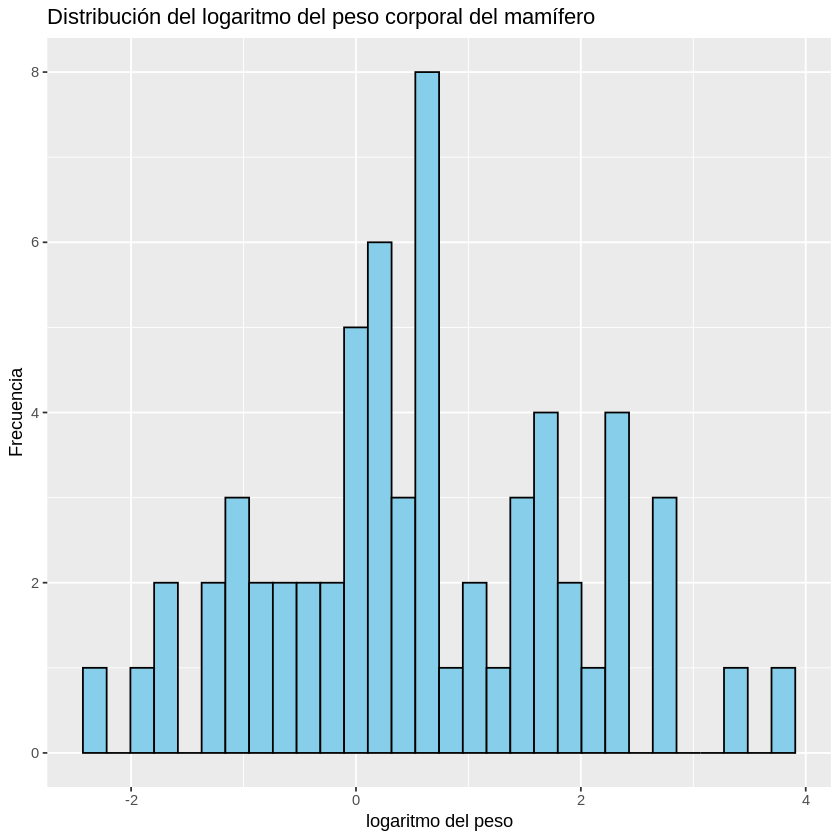

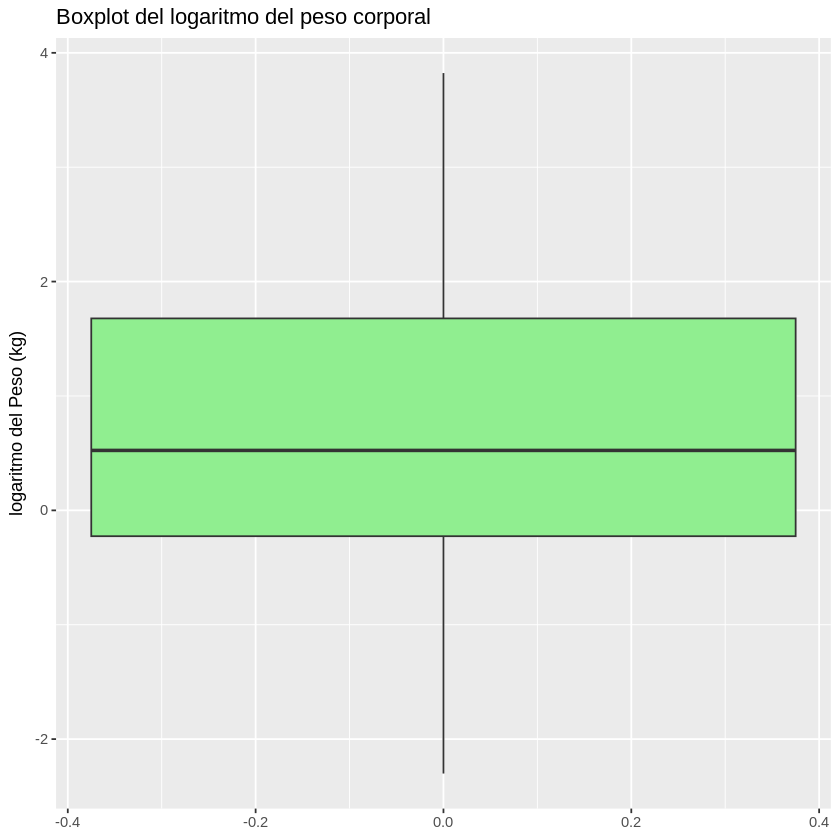

In [41]:
#histograma
#Diagrama de barras de la variable BodyWht
ggplot(sleep_limpio_BodyWgt,aes(log_BodyWgt))+
  geom_histogram(bin=30,fill="skyblue",color="black")+
  labs(title="Distribución del logaritmo del peso corporal del mamífero",
x="logaritmo del peso",
y="Frecuencia")


#boxplot

ggplot(sleep_limpio_BodyWgt,aes(y=log_BodyWgt))+
  geom_boxplot(fill="lightgreen",outlier.shape=NA)+
  labs(title="Boxplot del logaritmo del peso corporal",
y="logaritmo del Peso (kg)")



¿La variable **BodyWgt** sigue una distribución normal?

Warning message in geom_histogram(aes(y = ..density..), bin = 30, fill = "skyblue", :
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


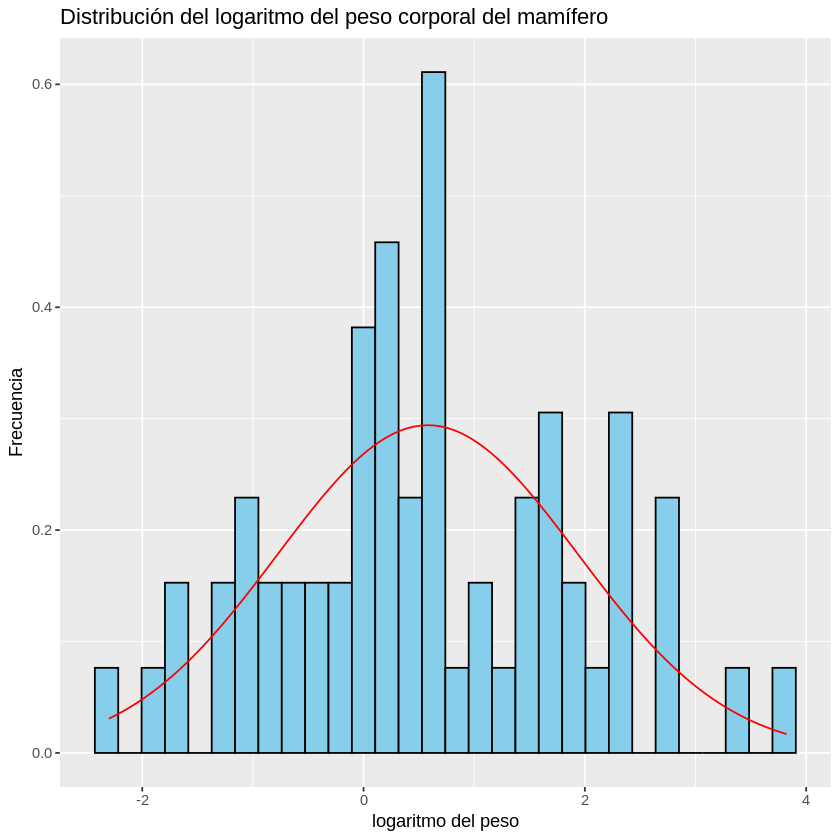

In [50]:
# Crear gráfico: Histograma de la variable BodyWgt con curva normal superpuesta
#Diagrama de barras de la variable BodyWht
ggplot(sleep_limpio_BodyWgt,aes(log_BodyWgt))+
  geom_histogram(
  aes(y= ..density..),
  bin=30,fill="skyblue",color="black")+
    stat_function(
    fun=dnorm,
    args = list(
      mean = mean(sleep_limpio_BodyWgt$log_BodyWgt),
      sd = sd(sleep_limpio_BodyWgt$log_BodyWgt)
    ),
    color="red"
    )+
  labs(title="Distribución del logaritmo del peso corporal del mamífero",
x="logaritmo del peso",
y="Frecuencia")






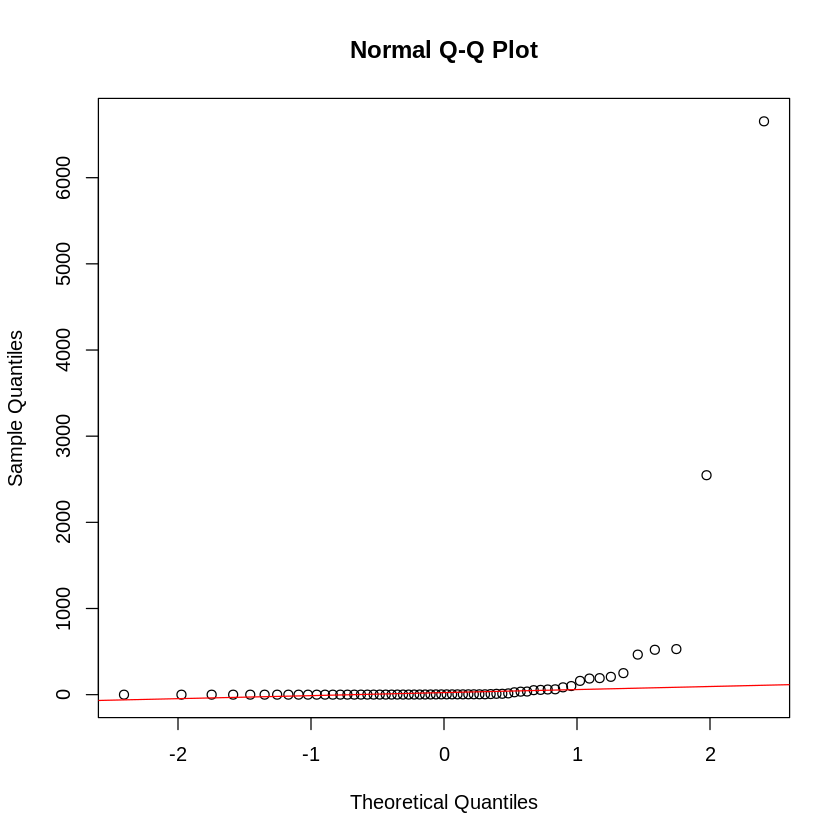

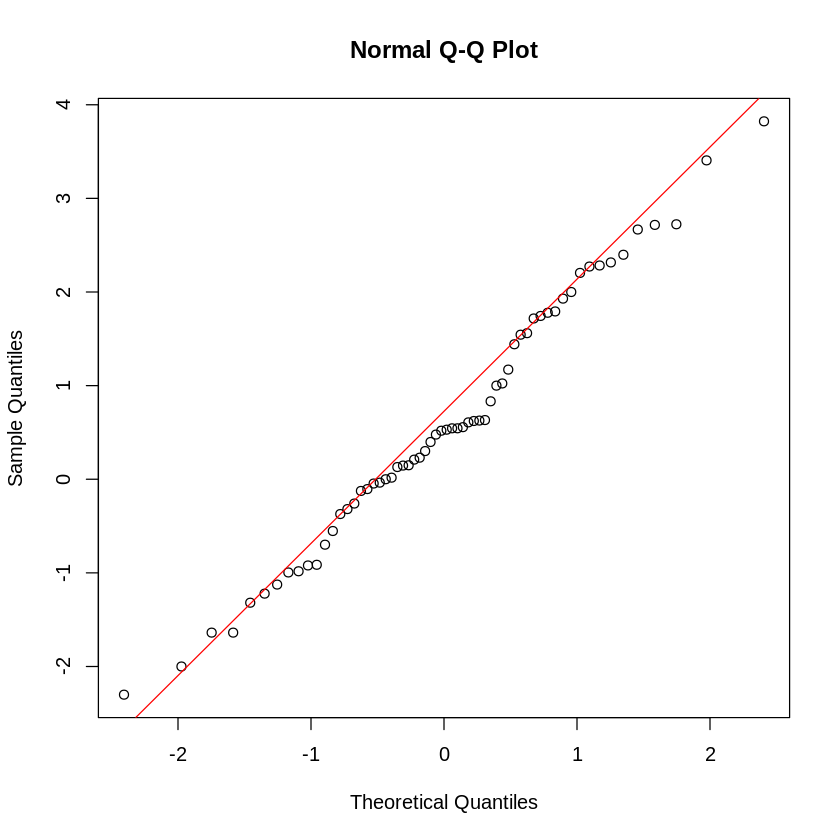

In [53]:
#Diagramas q-q plot:
qqnorm(sleep_limpio_BodyWgt$BodyWgt)
qqline(sleep_limpio_BodyWgt$BodyWgt, col="red")


qqnorm(sleep_limpio_BodyWgt$log_BodyWgt)
qqline(sleep_limpio_BodyWgt$log_BodyWgt, col="red")



In [54]:
#Test de normalidad variable original
shapiro.test(sleep_limpio_BodyWgt$BodyWgt)

#Test de normalidad variable transformada
shapiro.test(sleep_limpio_BodyWgt$log_BodyWgt)




	Shapiro-Wilk normality test

data:  sleep_limpio_BodyWgt$BodyWgt
W = 0.22239, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sleep_limpio_BodyWgt$log_BodyWgt
W = 0.98645, p-value = 0.7272


¿y la variable **log_BodyWgt**?

In [ ]:
# Crear gráfico: Histograma del logaritmo de BodyWgt con una curva normal superpuesta





In [ ]:
#qqplot varaible log



In [ ]:
#test de normalidad






Podemos así ver la importancia del análisis inicial y de la conveniencia de usar transformaciones de las variables.

## Análisis de Correlación y Covarianza

Explorar relaciones entre variables cuantitativas, identificar patrones lineales y cuantificar la fuerza y dirección de esas relaciones mediante medidas como correlación y covarianza.

- **Correlación de Pearson (cor())**

Variante normalizada de la covarianza.

Valores que oscilan entre -1 y 1:

* +1: correlación perfecta positiva
* 0: sin relación lineal
* -1: correlación perfecta negativa

Supone linealidad y normalidad de las variables.

- **Correlación de Spearman**

Se basa en rangos → no asume normalidad ni linealidad.
Útil para datos ordinales o relaciones no lineales monótonas.

- **Covarianza (cov())**

Mide la tendencia conjunta de dos variables a aumentar o disminuir.

* Valor positivo: las variables tienden a crecer juntas.
* Valor negativo: una aumenta y la otra disminuye.

Muy sensible a la escala de las variables




### Correlación:

Comenzamos con el análisis de correlación

In [59]:
# Comenzamos seleccionando solo variables numéricas completas
# recordemos que tenemos que convertir las trews variables pred, exp y danger en factores:

# Conversión de variables numéricas a factores (categorías)
sleep_limpio <- sleep%>%
  mutate(
  Pred = as.factor(Pred),
  Exp=as.factor(Exp),
  Danger=as.factor(Danger)
  )

(sleep_numerico <- sleep_limpio%>%
  select_if(is.numeric))



#Para no perder los datos, vamos a imputar con ridge, como hicimos en el módulo II:
new_sleep_ridge <- empire::estimate_ridge(data=sleep_numerico, diff=10, ridge_alpha=0)$new_dat

View(new_sleep_ridge)


# Aplicar imputación por regresión lineal penalizada (ridge)




BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6654.000,5712.0,NA,NA,3.3,38.6,645
1.000,6.6,6.3,2.0,8.3,4.5,42
3.385,44.5,NA,NA,12.5,14.0,60
0.920,5.7,NA,NA,16.5,NA,25
2547.000,4603.0,2.1,1.8,3.9,69.0,624
10.550,179.5,9.1,0.7,9.8,27.0,180
0.023,0.3,15.8,3.9,19.7,19.0,35
160.000,169.0,5.2,1.0,6.2,30.4,392
3.300,25.6,10.9,3.6,14.5,28.0,63


BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6654.000,5712.0,0.9303709,2.2822647,3.30000,38.60000,645.00000
1.000,6.6,6.3000000,2.0000000,8.30000,4.50000,42.00000
3.385,44.5,9.7752072,2.3017212,12.50000,14.00000,60.00000
0.920,5.7,12.9812095,3.2927115,16.50000,10.21313,25.00000
2547.000,4603.0,2.1000000,1.8000000,3.90000,69.00000,624.00000
10.550,179.5,9.1000000,0.7000000,9.80000,27.00000,180.00000
0.023,0.3,15.8000000,3.9000000,19.70000,19.00000,35.00000
160.000,169.0,5.2000000,1.0000000,6.20000,30.40000,392.00000
3.300,25.6,10.9000000,3.6000000,14.50000,28.00000,63.00000


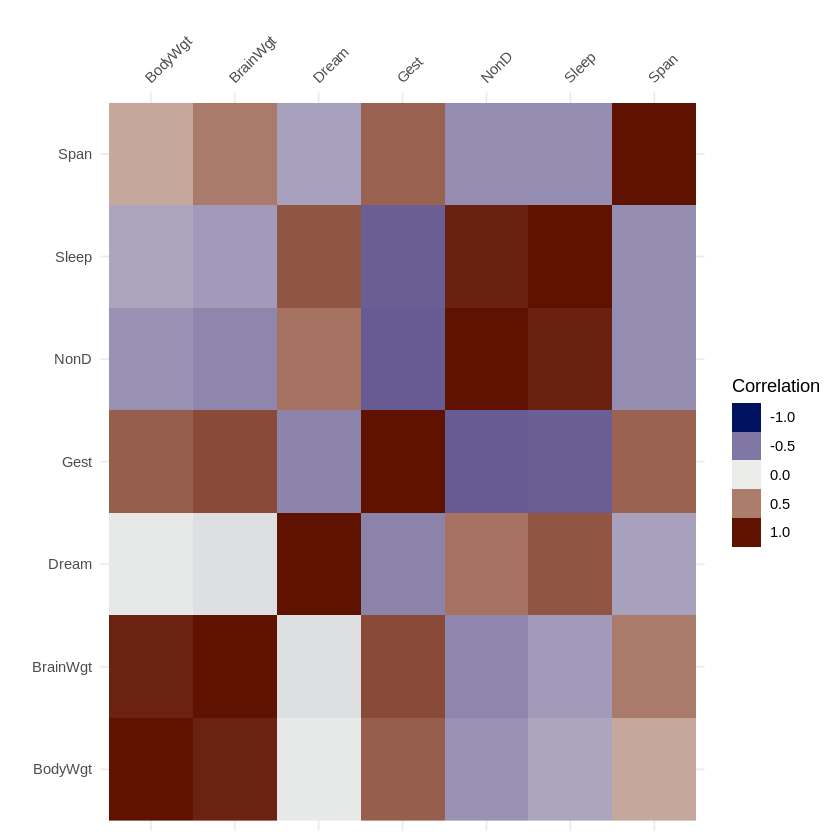

In [62]:
# Correlación de Pearson
visdat::vis_cor(new_sleep_ridge,na.action("complete.obs"))



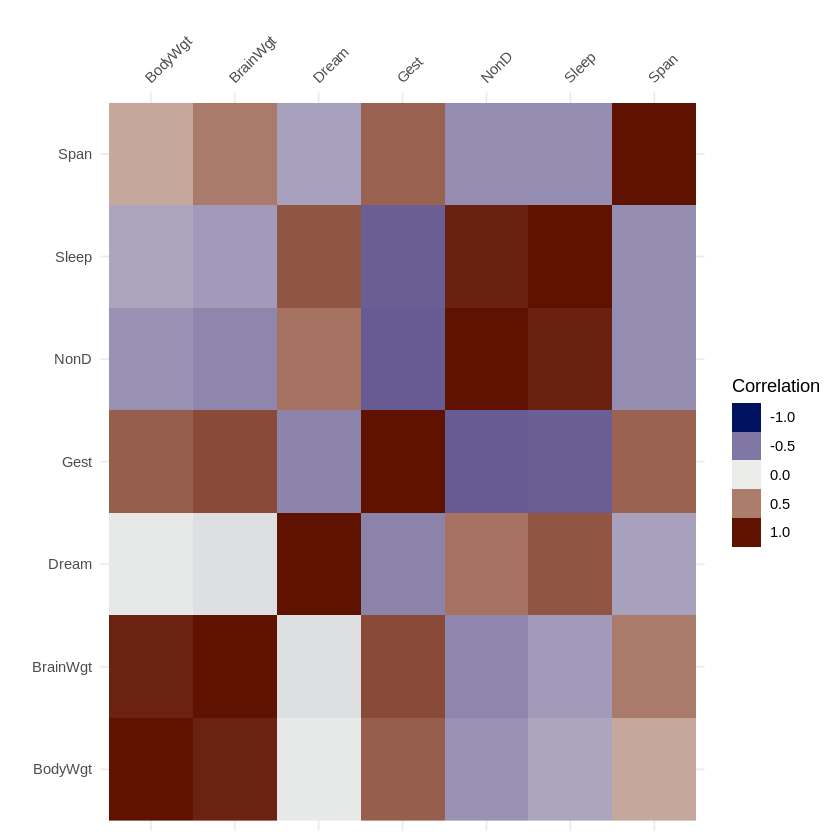

In [63]:
# Correlación de Spearman
visdat::vis_cor(new_sleep_ridge,corr_method="spearman",na.action("complete.obs"))



| Característica      | **Correlación de Pearson**            | **Correlación de Spearman**                                  |
| ------------------- | ------------------------------------- | ------------------------------------------------------------ |
| Tipo de relación    | Lineal                                | Monótona (creciente o decreciente, no necesariamente lineal) |
| Datos esperados     | Cuantitativos, normales, sin outliers | Cuantitativos u ordinales, **no requiere normalidad**        |
| Sensible a outliers |  Sí, mucho                           |  No, al trabajar con rangos                                 |
| Escala utilizada    | Escala original                       | Rangos (datos convertidos a posiciones)                      |


**Comparación visual entre ambas matrices**

* Matriz de Pearson:

Se observan correlaciones muy altas (casi 1) entre algunas variables como BodyWgt y BrainWgt.

También aparecen correlaciones negativas marcadas entre variables como Gest y Sleep.

Sin embargo, la intensidad puede estar amplificada por outliers o por relaciones no perfectamente lineales.

* Matriz de Spearman:

Las correlaciones siguen una tendencia similar, pero son más moderadas (es decir, no tan extremas).

Las relaciones como BrainWgt ~ BodyWgt siguen siendo fuertes, pero no perfectas.

Algunas correlaciones negativas están más suavizadas, lo cual puede reflejar que las relaciones no son lineales, pero sí monótonas.

                                                                                             
- **Lineal**:

Cuando los datos siguen aproximadamente una **línea recta**. Es decir, por cada incremento en X, Y cambia siempre en proporción constante.                                          

- **Monótona**:

Cuando una variable **siempre aumenta o disminuye con la otra**, pero no necesariamente en línea recta. Puede crecer más rápido, más lento.


**Podemos responder entonces:**

- ¿Hay colinealidad?
- ¿Qué variables parecen tener una relación no lineal?
- ¿Conviene usar Spearman si hay outliers?

### Covarianza:

In [69]:
# Paso 1: Convertimos la matriz de covarianza en data frame y la reestructuramos en formato largo

matriz_cov <- cov(new_sleep_ridge)
matriz_cov

melted_cov <- as.data.frame(matriz_cov)%>%
  mutate(var1=rownames(.))%>%
pivot_longer(-var1,
names_to = "var2",
values_to ="value")
melted_cov



,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest
BodyWgt,808485.12788,781397.93941,-1242.280538,-21.885641,-1228.867451,4884.547247,83559.82161
BrainWgt,781397.93941,865418.91040,-1453.712598,-72.041014,-1484.149827,8461.068993,99257.49596
NonD,-1242.28054,-1453.71260,13.177759,2.730901,15.785774,-25.786165,-325.86751
Dream,-21.88564,-72.04101,2.730901,1.905129,4.391123,-7.695037,-88.33433
Sleep,-1228.86745,-1484.14983,15.785774,4.391123,21.411639,-32.715150,-405.10415
Span,4884.54725,8461.06899,-25.786165,-7.695037,-32.715150,313.941965,1598.45630
Gest,83559.82161,99257.49596,-325.867506,-88.334331,-405.104148,1598.456297,20726.55705


var1,var2,value
<chr>,<chr>,<dbl>
BodyWgt,BodyWgt,808485.127878
BodyWgt,BrainWgt,781397.939411
BodyWgt,NonD,-1242.280538
BodyWgt,Dream,-21.885641
BodyWgt,Sleep,-1228.867451
BodyWgt,Span,4884.547247
BodyWgt,Gest,83559.821605
BrainWgt,BodyWgt,781397.939411
BrainWgt,BrainWgt,865418.910402


Warning message in plot_theme(plot):
“The `legen.title` theme element is not defined in the element hierarchy.”


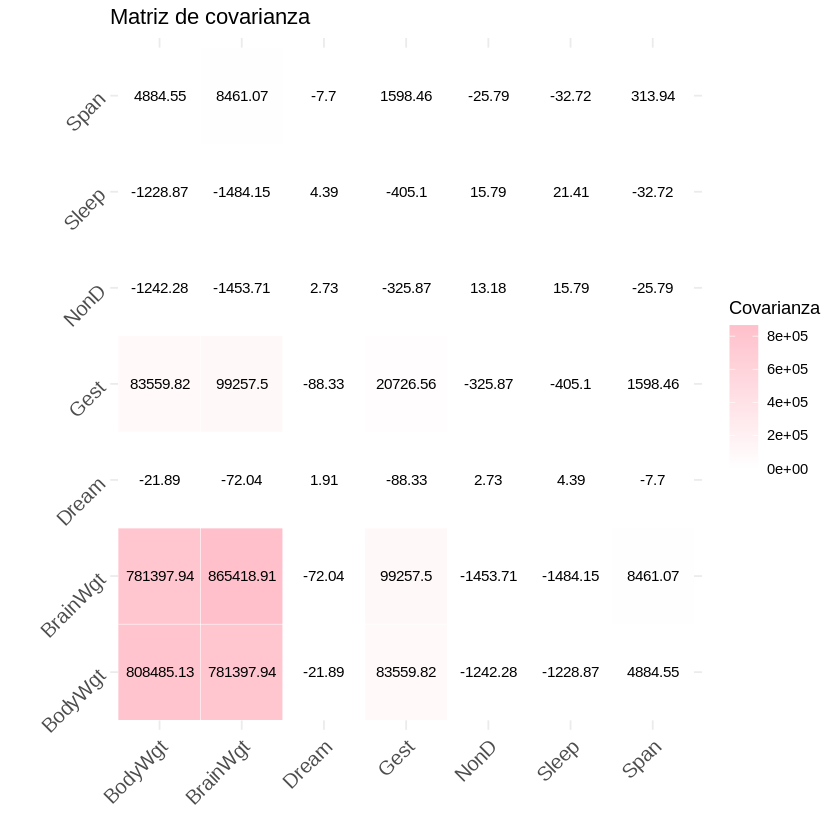

In [77]:
# Paso 2: Visualizamos la matriz de covarianza como un mapa de calor con valores incluidos
ggplot(melted_cov,aes(x = var1, y = var2, fill= value))+
geom_tile(color="white")+
geom_text(aes(label=round(value,2)), size=3.2, color="black")+
  scale_fill_gradient2(low="blue",mid="white",high="pink", midpoint=0)+
  labs(
  title="Matriz de covarianza",
  x="",y="",fill="Covarianza"
  )+
    theme_minimal()+
    theme(
    legen.title=element_text(size=12),
    axis.text.x=element_text(angle=45,hjust=1,size=12),
    axis.text.y=element_text(angle=45,hjust=1,size=12)
    )





¿Qué vemos?:

El valor numérico de la covarianza entre dos variables (p. ej. entre BodyWgt y BrainWgt) está asociado con un color rojo más intenso, indicando mayor covarianza positiva.

Los valores más cercanos a 0 (blanco o rosa muy claro) indican poca o nula relación lineal conjunta.


1. Covarianzas altas y positivas:

* BodyWgt con BrainWgt

* BodyWgt con Gest

* BrainWgt con Gest


Estas variables tienden a variar conjuntamente: cuando una aumenta, las otras también. Esto tiene sentido biológico, ya que animales más grandes (mayor BodyWgt) tienden a tener cerebros más grandes (BrainWgt) y gestaciones más largas (Gest).

2. Covarianzas negativas

* BodyWgt con Sleep
* BodyWgt con NonD
* Gest con Sleep


Estas relaciones indican que cuando una variable aumenta, la otra tiende a disminuir.

Por ejemplo:

Los animales más grandes tienden a dormir menos.
Los animales con mayor gestación también duermen menos (posiblemente especies más longevas, activas o expuestas).

3. Covarianzas cercanas a cero

* Dream con casi todas las demás variables.
* NonD con Dream, Gest, etc.


No hay una relación clara ni fuerte entre estas variables en términos de variación conjunta.

Es **importante* tener en cuenta que la covarianza depende de las unidades de las variables, por eso hay números muy grandes (como BrainWgt en gramos, por ejemplo).

Para comparar más fácilmente entre pares de variables, es mejor usar la correlación, que está normalizada entre -1 y 1.

Esta matriz sí es muy útil para detectar agrupaciones de variables altamente relacionadas, como BodyWgt, BrainWgt, Gest.

## Tablas de frecuencias y análisis de variables categóricas


En esta parte del módulo, nos enfocaremos en reconocer y analizar variables categóricas nominales y ordinales.

Para ello, elaboraremos tablas de frecuencias (absolutas y relativas).

Vamos a representar visualmente la distribución de variables categóricas.

Y exploraremos asociaciones entre variables categóricas (introducción a tablas de contingencia).

In [84]:
# Cargar el paquete janitor, que incluye funciones útiles para el manejo de tablas categóricas

# Tabla de frecuencias absolutas y relativas para la variable 'Danger'
sleep_limpio%>%
  tabyl(Danger)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada=cumsum(n),
  pct=round(percent,2),
  pct_acumulada=round(cumsum(percent),2)
  )
  #adorn_pct_formatting()




# Tabla de frecuencias para la variable 'Pred'

sleep_limpio%>%
  tabyl(Pred)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada=cumsum(n),
  pct=round(percent,2),
  pct_acumulada=round(cumsum(percent),2)
  )
  #adorn_pct_formatting()




# Tabla de frecuencias para la variable 'Exp'

sleep_limpio%>%
  tabyl(Exp)%>%
  arrange(desc(n))%>%
  mutate(
  freq_acumulada=cumsum(n),
  pct=round(percent,2),
  pct_acumulada=round(cumsum(percent),2)
  )
  #adorn_pct_formatting()





Danger,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,19,0.3064516,19,0.31,0.31
2,14,0.2258065,33,0.23,0.53
3,10,0.1612903,43,0.16,0.69
4,10,0.1612903,53,0.16,0.85
5,9,0.1451613,62,0.15,1.00


Pred,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
2,15,0.2419355,15,0.24,0.24
1,14,0.2258065,29,0.23,0.47
5,14,0.2258065,43,0.23,0.69
3,12,0.1935484,55,0.19,0.89
4,7,0.1129032,62,0.11,1.00


Exp,n,percent,freq_acumulada,pct,pct_acumulada
<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,27,0.43548387,27,0.44,0.44
2,13,0.20967742,40,0.21,0.65
5,13,0.20967742,53,0.21,0.85
4,5,0.08064516,58,0.08,0.94
3,4,0.06451613,62,0.06,1.00


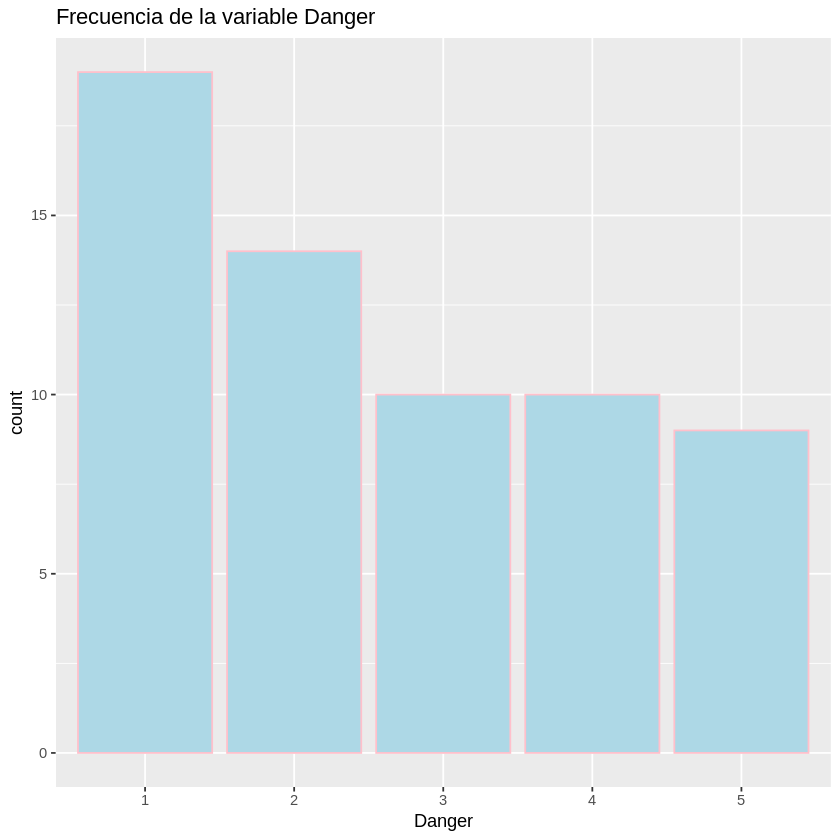

In [85]:
# Gráfico de barras de la variable Danger
ggplot(sleep_limpio,aes(Danger))+
  geom_bar(fill="lightblue", color="pink")+
  labs(
  title="Frecuencia de la variable Danger"
  )



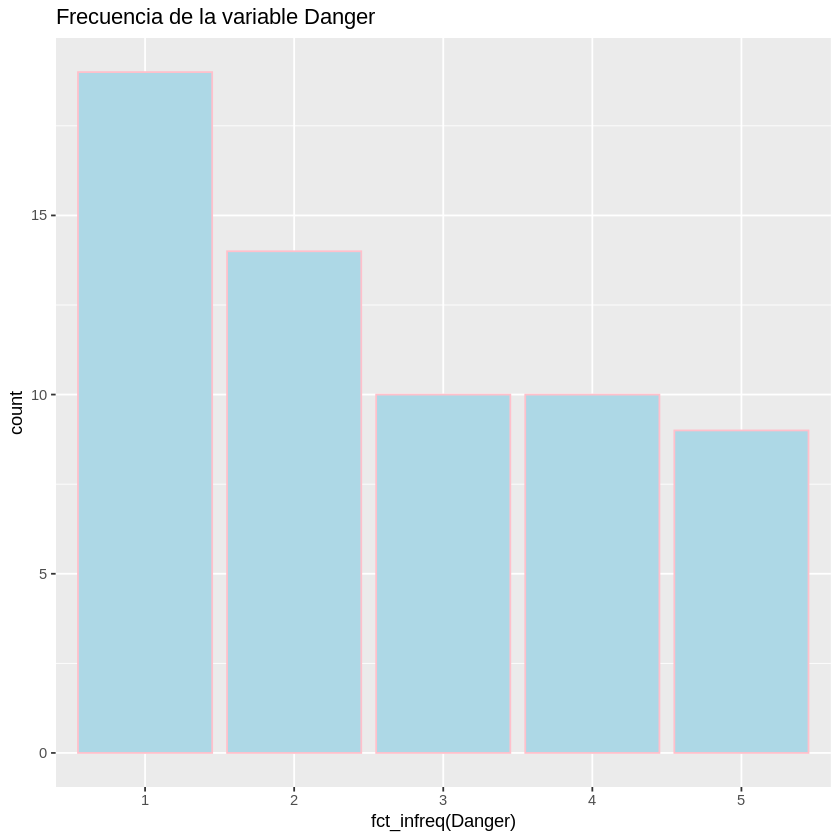

In [87]:
# Gráfico de barras de la variable Danger ordenado descendentemente

ggplot(sleep_limpio,aes(fct_infreq(Danger)))+
  geom_bar(fill="lightblue", color="pink")+
  labs(
  title="Frecuencia de la variable Danger"
  )



Danger,n,porcentaje,etiqueta
<fct>,<int>,<dbl>,<chr>
1,19,0.3064516,30.65%
2,14,0.2258065,22.58%
3,10,0.1612903,16.13%
4,10,0.1612903,16.13%
5,9,0.1451613,14.52%


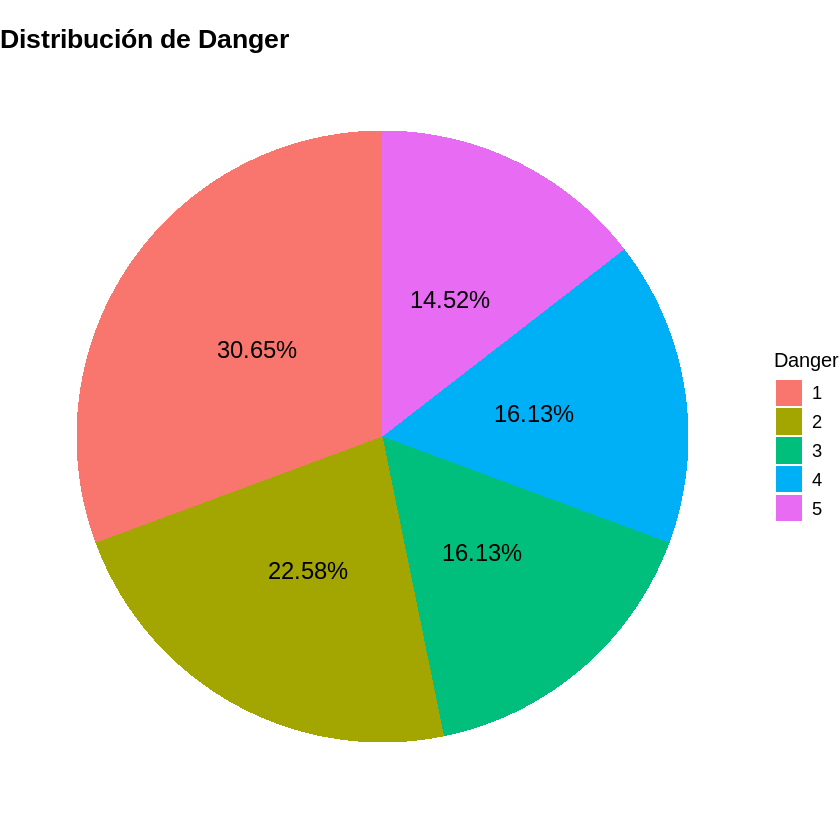

In [98]:
# Para graficar un pie-chart
# ggplo2 no ofrece directamente un pie-chart, por lo que se deben hacer algunos cálculos
# Paso 1: Calcular la tabla de frecuencias

tabla_pie <-sleep_limpio%>%
  count(Danger)%>%
  mutate(
  porcentaje = n/sum(n),
  etiqueta=paste0(round(porcentaje*100,2),"%")
  )
tabla_pie



# Paso 2: Crear el gráfico de pastel

ggplot(tabla_pie,aes(x="",y=porcentaje, fill=Danger))+
  geom_bar(stat = "identity", width=1)+
  coord_polar("y", start=0)+
  geom_text(aes(label=etiqueta),
    position=position_stack(vjust=0.5),
    size=5)+
      labs(title="Distribución de Danger", x="", y="", fill="Danger")+
      theme_void()+
      theme(plot.title=element_text(size=16, face="bold"),
      legend.title=element_text(size=12),
      legend.text=element_text(size=11))




  # Agregar etiquetas de porcentaje centradas en cada porción




  # Agregar títulos y leyenda




  # Modificar el tamaño del título y leyenda





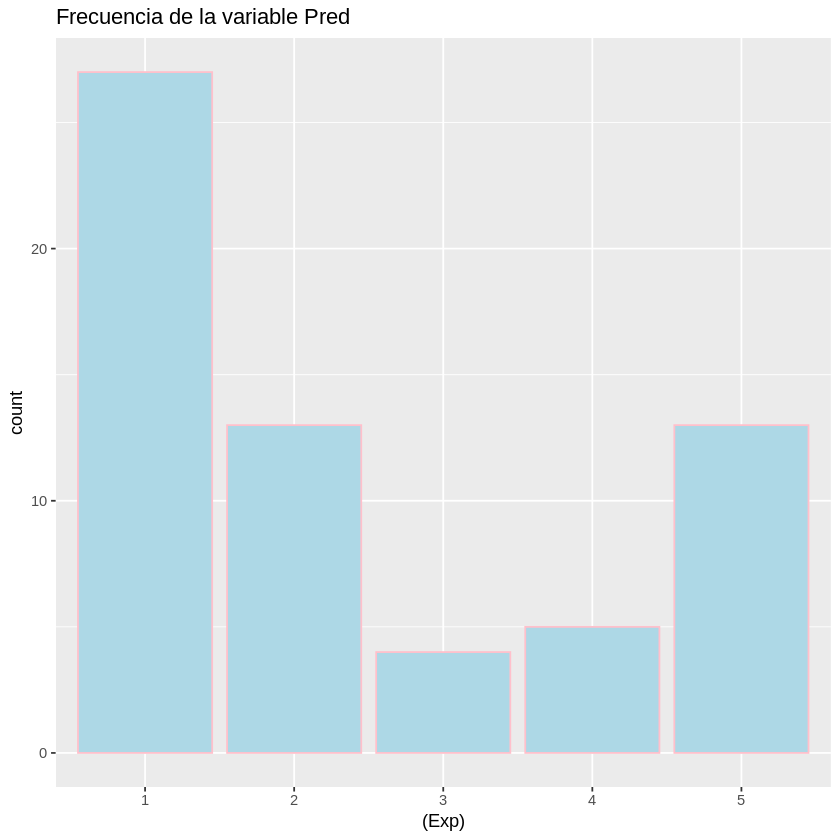

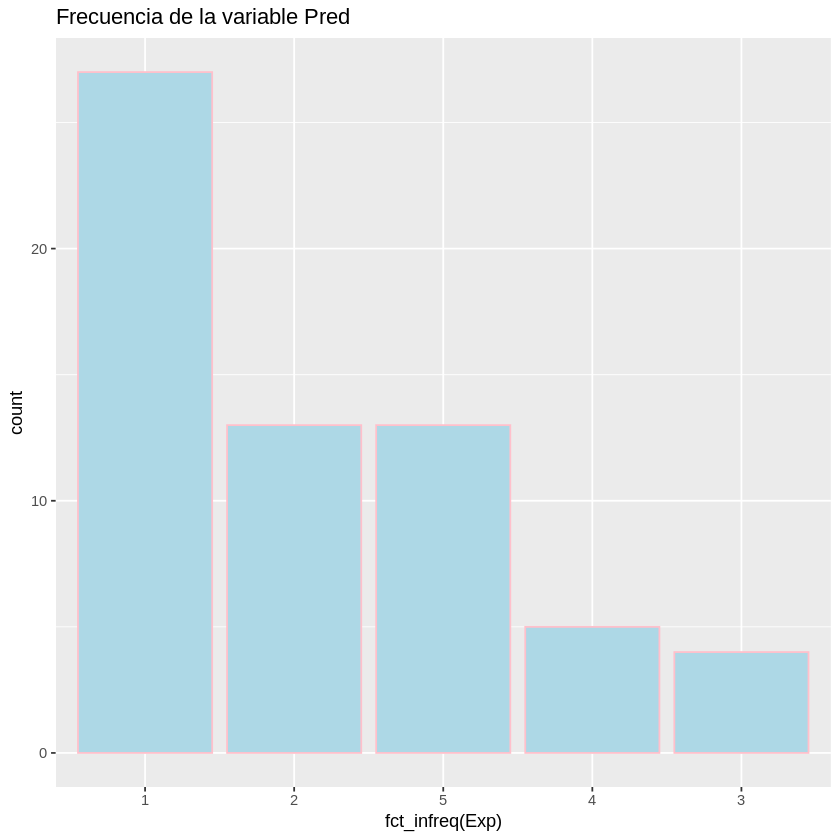

In [90]:
#Diagarama de barras de la bariable Exp ordenado por frecuencia descendente

ggplot(sleep_limpio,aes((Exp)))+
  geom_bar(fill="lightblue", color="pink")+
  labs(
  title="Frecuencia de la variable Pred"
  )

ggplot(sleep_limpio,aes(fct_infreq(Exp)))+
  geom_bar(fill="lightblue", color="pink")+
  labs(
  title="Frecuencia de la variable Pred"
  )


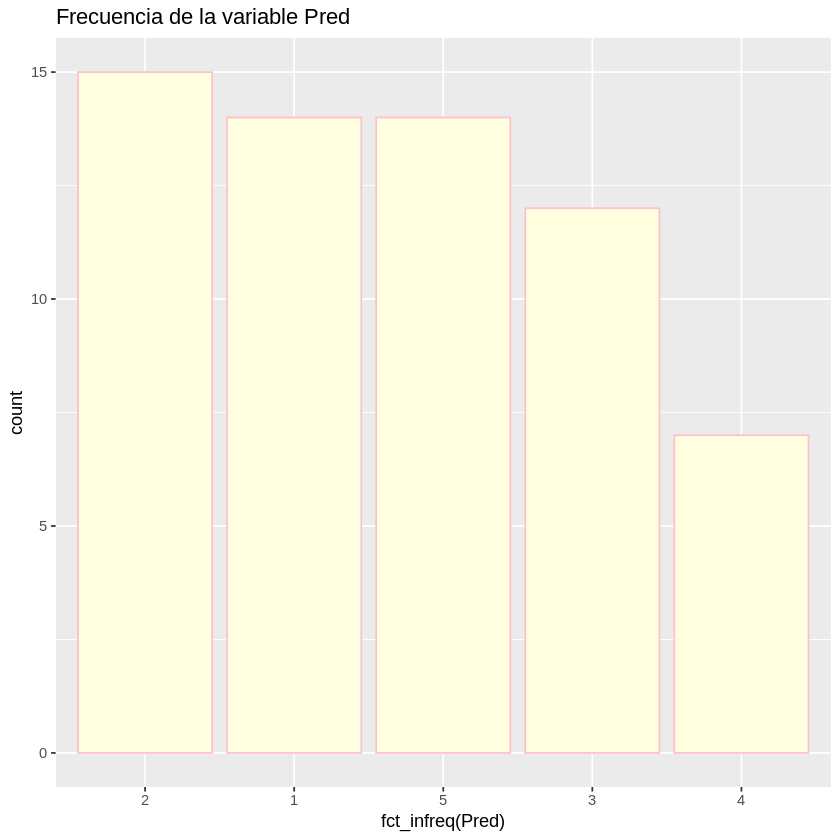

In [99]:
#Diagrama de frecuencias variable Pred

ggplot(sleep_limpio,aes(fct_infreq(Pred)))+
  geom_bar(fill="lightyellow", color="pink")+
  labs(
  title="Frecuencia de la variable Pred"
  )



Pred,n,porcentaje,etiqueta
<fct>,<int>,<dbl>,<chr>
1,14,0.2258065,22.58%
2,15,0.2419355,24.19%
3,12,0.1935484,19.35%
4,7,0.1129032,11.29%
5,14,0.2258065,22.58%


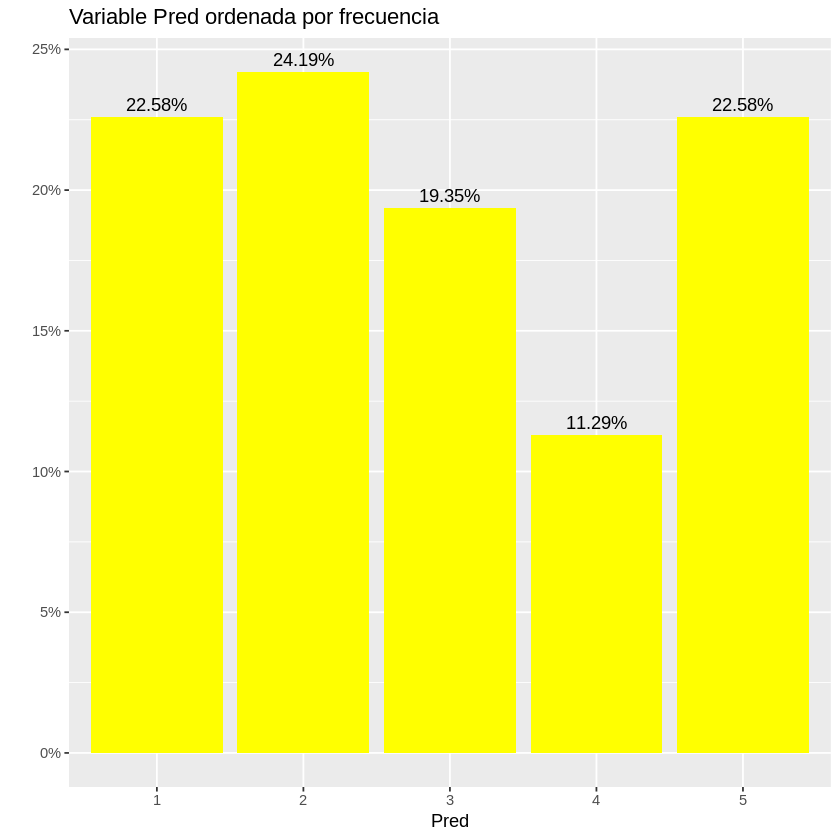

In [102]:
#Para poder agregar la etiqueta de los porcentajes:

# Paso 1: Calcular las frecuencias relativas

(tabla_pred <-sleep_limpio%>%
  count(Pred)%>%
  mutate(
  porcentaje = n/sum(n),
  etiqueta=paste0(round(porcentaje*100,2),"%")
  ))




# Paso 2: Gráfico con etiquetas


ggplot(tabla_pred,aes(x=fct_infreq(Pred),y=porcentaje))+
  geom_col(fill="yellow")+
  geom_text(aes(label=etiqueta, vjust=-0.5))+
  scale_y_continuous(labels = scales::percent_format(accuracy=1))+
  labs(title="Variable Pred ordenada por frecuencia",
  x="Pred",y="")




### Tablas cruzadas

In [103]:
# Tabla cruzada entre dos variables categóricas
# Tabla cruzada con porcentajes por fila y renombrado

sleep_limpio%>%
  tabyl(Pred,Danger)%>%
  adorn_percentages("row")






Pred,1,2,3,4,5
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.00000000,0.0000000,0.0000000,0.0000000,0.0000000
2,0.26666667,0.7333333,0.0000000,0.0000000,0.0000000
3,0.08333333,0.2500000,0.5000000,0.1666667,0.0000000
4,0.00000000,0.0000000,0.2857143,0.7142857,0.0000000
5,0.00000000,0.0000000,0.1428571,0.2142857,0.6428571


Pred,Danger,n,prop,etiqueta
<fct>,<fct>,<int>,<dbl>,<chr>
1,1,14,1.00000000,100%
2,1,4,0.26666667,26.7%
2,2,11,0.73333333,73.3%
3,1,1,0.08333333,8.3%
3,2,3,0.25000000,25%
3,3,6,0.50000000,50%
3,4,2,0.16666667,16.7%
4,3,2,0.28571429,28.6%
4,4,5,0.71428571,71.4%


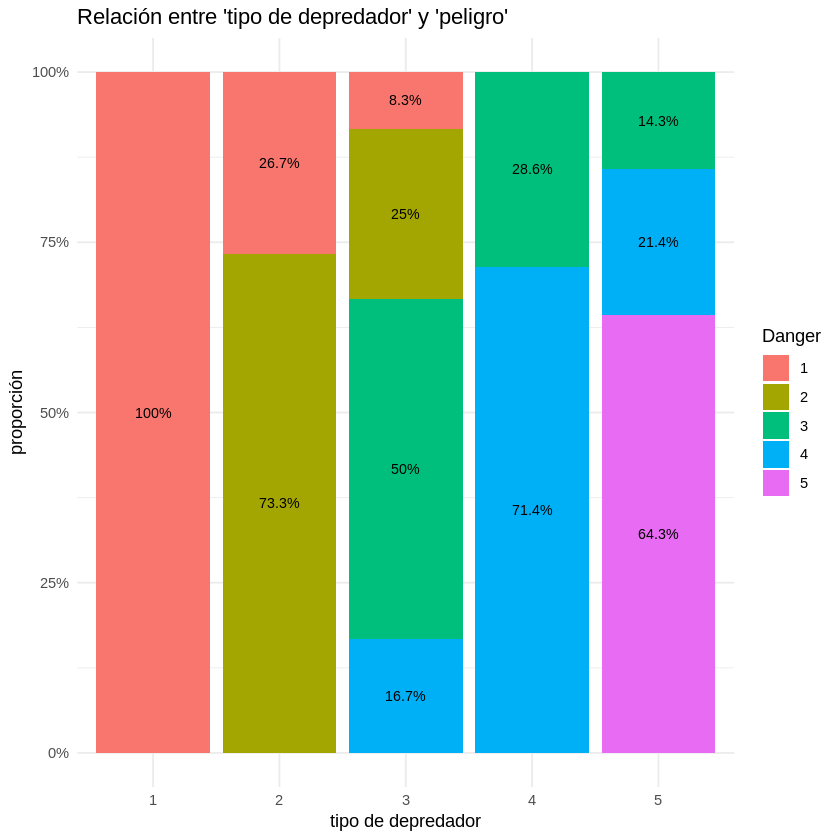

In [112]:
#Diagrama de barras con dos variables categóricas e inclusión de la frecuencia

# Paso 1: Calcular proporciones por grupo

(tabla_prop<-sleep_limpio%>%
  count(Pred,Danger)%>%
  group_by(Pred)%>%
  mutate(
  prop= n/sum(n),
  etiqueta=paste0(round(prop*100,1),"%")
  ))



# Paso 2: Gráfico de barras apiladas con etiquetas

ggplot(tabla_prop,aes(x=Pred,y=prop,fill=Danger))+
  geom_col(position="fill")+
  geom_text(aes(label=etiqueta),
      position=position_fill(vjust=0.5),size=3)+
  scale_y_continuous(labels=scales::percent_format(accuracy=1))+
  labs(
  title="Relación entre 'tipo de depredador' y 'peligro'",
  x="tipo de depredador",
  y="proporción"
  )+
    theme_minimal()







In [114]:
# Análisis de asociación o relación entre dos variables categóricas

chisq.test(table(sleep_limpio$Pred, sleep_limpio$Danger))


chisq.test(table(sleep_limpio$Pred, sleep_limpio$Exp))

chisq.test(table(sleep_limpio$Danger, sleep_limpio$Exp))

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(sleep_limpio$Pred, sleep_limpio$Danger)
X-squared = 118.45, df = 16, p-value < 2.2e-16


Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(sleep_limpio$Pred, sleep_limpio$Exp)
X-squared = 47.678, df = 16, p-value = 5.335e-05


Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(sleep_limpio$Danger, sleep_limpio$Exp)
X-squared = 82.044, df = 16, p-value = 7.11e-11


* Si el valor-p es bajo (generalmente < 0.05):

Hay evidencia para rechazar la hipótesis nula, por lo que las variables sí están asociadas.

* Si el valor-p es alto:

No rechazamos la hipótesis nula, por lo que no hay suficiente evidencia para concluir que hay una relación, por lo que las variables parecen independientes.



El test de Chi-cuadrado asume que:

Al menos el 80% de las celdas deben tener frecuencias esperadas ≥ 5.

Ninguna celda debería tener una frecuencia esperada menor que 1.

Si esto no se cumple, la aproximación al valor-p usando la distribución Chi² puede no ser confiable, y por eso R nos advierte.



## Distribuciones de probabilidad


¿Qué es una distribución de probabilidad?

Una distribución de probabilidad describe cómo se distribuyen los valores posibles de una variable aleatoria. Es un modelo matemático que asigna una probabilidad a cada valor (discreto) o rango de valores (continuo).

Para variables discretas, usamos funciones de masa de probabilidad (como binomial o Poisson).
Para variables continuas, usamos funciones de densidad (como la normal o exponencial).






### Distribución normal:

Es una de las más comunes y útiles en estadística:

Tiene forma de campana simétrica.

Se define por dos parámetros:

* Media (μ)
* Desviación estándar (σ)

**Ejemplo:**

Comparar la distribución empírica de una variable cuantitativa con la teórica normal, usando ggplot2.

Usaremos la variable log_BodyWgt (peso logarítmico), ya que anteriormente mostramos que la transformación mejora la simetría y reduce outliers.

Warning message in geom_histogram(aes(y = ..density..), bin = 30, fill = "skyblue", :
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


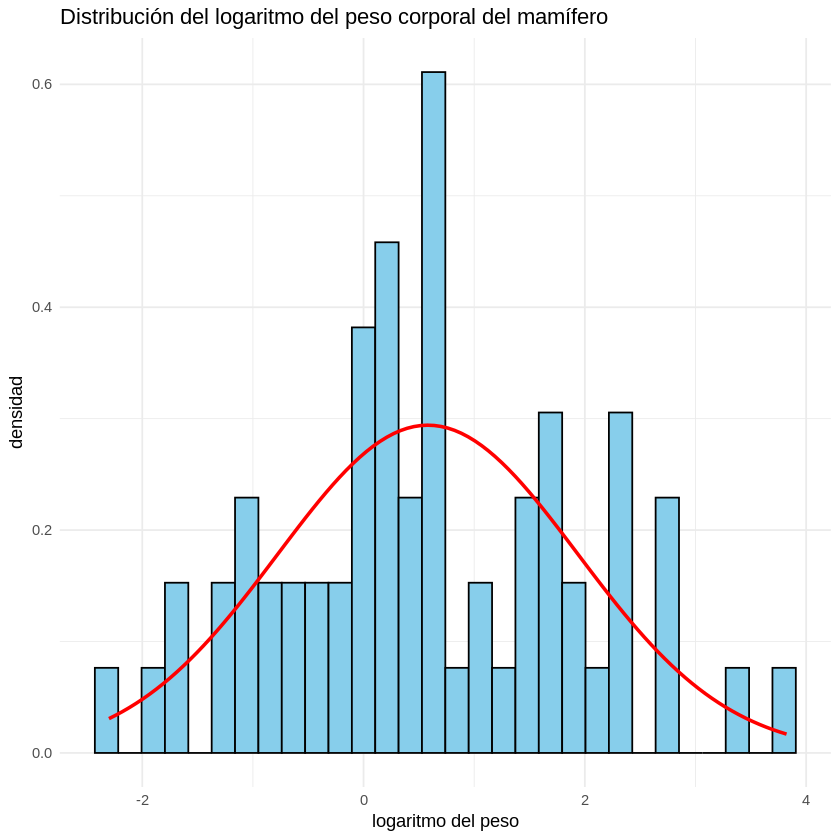

In [121]:
# Crear gráfico con histograma y curva de densidad normal teórica



  # Histograma con densidad (no frecuencia)
ggplot(sleep_limpio_BodyWgt,aes(log_BodyWgt))+
  geom_histogram(
  aes(y=..density..), bin=30, fill="skyblue",color="black")+
  stat_function(
  fun=dnorm,
  args=list(
    mean=mean(sleep_limpio_BodyWgt$log_BodyWgt, na.rm=T),
    sd=sd(sleep_limpio_BodyWgt$log_BodyWgt,na.rm=T)
  ),
  color="red",size=1
  )+
  labs(title="Distribución del logaritmo del peso corporal del mamífero",
x="logaritmo del peso",
y="densidad")+
  theme_minimal()






  # Curva de densidad normal teórica ajustada a los datos





  # Etiquetas y estilo






--------------
| Función   | ¿Qué hace?                       | Ejemplo práctico                |
| --------- | -------------------------------- | ------------------------------- |
| `rnorm()` | Genera datos aleatorios          | Simulación de muestras          |
| `dnorm()` | Densidad (altura de la curva)    | Dibujar curva normal            |
| `pnorm()` | Probabilidad acumulada           | Calcular $P(X < x)$             |
| `qnorm()` | Cuantil inverso (valor de corte) | Buscar z tal que $P(X < z) = p$ |

-------------

**Ejercicio**:

Se sabe que el tiempo promedio que duerme un mamífero adulto es de 10 horas al día, con una desviación estándar de 2 horas.
Se asume que los tiempos de sueño siguen una distribución normal.


Grafica la distribución normal con μ=10 y σ=2.

Calcula las siguientes probabilidades:
* Que un mamífero duerma más de 12 horas al día.
* Que un mamífero duerma entre 8 y 12 horas.
* Que un mamífero duerma menos de 6 horas.

Visualiza las áreas bajo la curva correspondientes a cada probabilidad.

Interpreta los resultados.

In [123]:
# Parámetros de la distribución
mu <- 10      # media
sigma <- 2    # desviación estándar

# Secuencia de valores x para graficar la curva
x_vals <- seq(0, 20, by = 0.1)

# Crear curva de densidad
ggplot(data.frame(x=x_vals),aes(x)), +
  stat_function(fun=dnorm, args=list(mean=mu, sd=sigma),
  color=blue
  ),
  color="red",size=1
  )+
  labs(title="Distribución del logaritmo del peso corporal del mamífero",
x="logaritmo del peso",
y="densidad")+
  theme_minimal()



# Cálculo de las probabilidades:
# a) P(X > 12)




# b) P(8 < X < 12)




# c) P(X < 6)




# Resultados




### Distribución Binomial

Modela el número de éxitos en un número fijo de ensayos independientes con dos posibles resultados: éxito o fracaso.

**Ejemplo típico:**

Lanzar una moneda 10 veces.
Probabilidad de obtener 6 caras.

Parámetros de esta distribución:
* n = número de ensayos
* p = probabilidad de éxito

In [ ]:
# Distribución binomial: 20 ensayos, probabilidad de éxito 0.3





# Gráfico de barras de la distribución







-------------------
| Función                 | Qué hace                                              | Ejemplo                              |
| ----------------------- | ----------------------------------------------------- | ------------------------------------ |
| `rbinom(n, size, prob)` | Simula datos binomiales (n muestras de tamaño `size`) | `rbinom(10, size = 20, prob = 0.5)`  |
| `dbinom(x, size, prob)` | Probabilidad exacta $P(X = x)$                        | `dbinom(5, size = 10, prob = 0.5)`   |
| `pbinom(q, size, prob)` | Probabilidad acumulada $P(X \leq q)$                  | `pbinom(6, 10, 0.5)` → $P(X \leq 6)$ |
| `qbinom(p, size, prob)` | Cuantil: valor $x$ tal que $P(X \leq x) = p$          | `qbinom(0.95, 10, 0.5)`              |

-------------


**Ejercicio**

Un grupo de biólogos está evaluando la peligrosidad de ciertas especies animales. De acuerdo con registros previos, aproximadamente el 40% de los animales evaluados son considerados peligrosos. Se eligen 20 animales al azar.

Queremos modelar este proceso como un experimento binomial con: n=20 ensayos (animales seleccionados)
y p=0.40 la probabilidad de éxito (que un animal sea peligroso)

Para ello, simula la distribución binomial correspondiente al número de animales peligrosos esperados en una muestra de 20.

Visualiza la distribución usando un gráfico de barras.

Calcula la probabilidad de que:
* Exactamente 8 animales sean peligrosos.
* Menos de 5 animales sean peligrosos.
* Al menos 10 animales sean peligrosos.
Interpreta los resultados.

In [ ]:
# Parámetros
n <- 20      # número de ensayos
p <- 0.40    # probabilidad de éxito

# Crear distribución binomial
binom_df <- data.frame(
  x = 0:n,
  prob = dbinom(0:n, size = n, prob = p)
)

# Visualización





# Cálculos de probabilidades específicas





# Mostrar resultados






### Distribución de Poisson

Modela el número de eventos que ocurren en un intervalo de tiempo o espacio cuando son raros y aleatorios.

**Ejemplo típico:**

* Número de llamadas por minuto a un centro de atención.
* Número de accidentes en una carretera por día.

Parámetro:

* λ = número medio de eventos en el intervalo.
* Si, X∼Poisson(λ), entonces la esperanza y varianza son iguales a λ.

In [ ]:
# Distribución de Poisson con media 5







--------------------

| Función            | Qué hace                                               | Ejemplo                  |
| ------------------ | ------------------------------------------------------ | ------------------------ |
| `rpois(n, lambda)` | Simula conteos con media $\lambda$                     | `rpois(10, lambda = 4)`  |
| `dpois(x, lambda)` | Probabilidad exacta $P(X = x)$                         | `dpois(2, lambda = 3)`   |
| `ppois(q, lambda)` | Probabilidad acumulada $P(X \leq q)$                   | `ppois(4, lambda = 2.5)` |
| `qpois(p, lambda)` | Cuantil: valor mínimo $x$ tal que $P(X \leq x) \geq p$ | `qpois(0.9, lambda = 3)` |


--------------------


**Ejercicio**:

Un investigador estudia el número de despertares breves que tienen ciertos animales durante el sueño. Se ha observado que, en promedio, ocurren 3 despertares por noche.

Queremos modelar este proceso como una distribución de Poisson, con: λ=3 número medio de eventos por unidad de tiempo (noche)


Crea la distribución de Poisson con λ=3 para los valores posibles de 0 a 10 despertares.

Visualiza la distribución mediante un gráfico de barras.

Calcula las siguientes probabilidades:

* Que haya exactamente 2 despertares.
* Que haya 4 o más despertares.
* Que haya entre 1 y 3 despertares (inclusive).

Interpreta los resultados.

In [ ]:
# Parámetro de la distribución
lambda <- 3

# Valores posibles de X (número de despertares)
x_vals <- 0:10

# Crear tabla de probabilidades
poisson_df <- data.frame(
  x = x_vals,
  prob = dpois(x_vals, lambda = lambda)
)



# Cálculo de las probabilidades:

# a) P(X = 2)





# b) P(X ≥ 4)





# c) P(1 ≤ X ≤ 3)





# Mostrar resultados






### Distribución exponencial:

La distribución exponencial es usada para modelar el tiempo entre eventos en un proceso que ocurre de manera aleatoria y continua a una tasa constante.

Tiene un solo parámetro: λ (lambda) = tasa de ocurrencia de eventos por unidad de tiempo

- **Media**: 1/λ

- **Varianza**: 1/λ^2


In [ ]:
set.seed(123)  # reproducibilidad

# Simular 200 tiempos entre eventos con tasa lambda = 0.5
# (es decir, en promedio un evento cada 2 unidades de tiempo)
exp_data <- rexp(n = 200, rate = 0.5)

# Crear dataframe
exp_df <- data.frame(tiempo = exp_data)


#Crea el histograma para el tiempo





--------------------
| Función         | Qué hace                                     | Ejemplo                 |
| --------------- | -------------------------------------------- | ----------------------- |
| `rexp(n, rate)` | Simula datos de tiempos de espera            | `rexp(10, rate = 0.2)`  |
| `dexp(x, rate)` | Densidad: valor de $f(x)$                    | `dexp(3, rate = 0.5)`   |
| `pexp(q, rate)` | Probabilidad acumulada $P(X \leq q)$         | `pexp(4, rate = 0.2)`   |
| `qexp(p, rate)` | Cuantil: valor $x$ tal que $P(X \leq x) = p$ | `qexp(0.9, rate = 0.2)` |

--------------------

Ejercicio:

Simula una variable que represente los tiempos entre visitas a una estación de observación de animales. Supón que los eventos ocurren a una tasa constante de 0.25 visitas por hora.

Simula 300 observaciones usando una distribución exponencial con rate = 0.25.

Grafica el histograma junto con la curva teórica de densidad.

Calcula la media y la varianza observadas.

Compara tus resultados con los valores teóricos.

Ajusta un nuevo valor de lambda y repite los pasos anteriores. ¿Cómo cambia la distribución?

In [ ]:
# Paso 1: Simular
set.seed(456)
tiempos <- rexp(n = 300, rate = 0.25)
df_tiempos <- data.frame(tiempo = tiempos)

# Paso 2: Visualizar



# Paso 3: Estadísticos





In [ ]:
# valor distinto de la tasa:

# Paso 1: Simular
set.seed(456)
tiempos <- rexp(n = 300, rate = 0.75)
df_tiempos <- data.frame(tiempo = tiempos)

# Paso 2: Visualizar




# Paso 3: Estadísticos





# Evaluación final



In [161]:
# ===================================
# EJERCICIO 1: Cargar y explorar el dataset
# ===================================
# Carga el dataset `PimaIndiansDiabetes` y explóralo con `glimpse()`

# Código base:
data(PimaIndiansDiabetes)
df <- as.data.frame(PimaIndiansDiabetes)


# TU CÓDIGO:
# glimpse( ... )

glimpse(PimaIndiansDiabetes)

df <- df %>%
  mutate(
    glucose = ifelse(glucose == 0, NA, glucose),
    pressure = ifelse(pressure == 0, NA, pressure),
    mass = ifelse(mass == 0, NA, mass),
    triceps = ifelse(triceps == 0, NA, triceps),
    insulin = ifelse(insulin == 0, NA, insulin)
  )

  glimpse(df)

# Selección previa:
df_numerico <- df %>% select_if(is.numeric)


# TU CÓDIGO:
df_imputado <- empire::estimate_ridge(data = df_numerico, diff = 10, ridge_alpha = 0)$new_dat

sum(is.na(df_imputado))
colSums(is.na(df_imputado))

Rows: 768
Columns: 9
$ pregnant <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1…
$ glucose  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139,…
$ pressure <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0,…
$ triceps  <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0…
$ insulin  <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230…
$ mass     <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37…
$ pedigree <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158…
$ age      <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 3…
$ diabetes <fct> pos, neg, pos, neg, pos, neg, pos, neg, pos, pos, neg, pos, n…
Rows: 768
Columns: 9
$ pregnant <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1…
$ glucose  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139,…
$ pressure <dbl> 72, 66, 64, 66, 40, 74, 50, NA, 70, 96, 92, 74, 80, 60, 72, N

[1] 0

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        0        0        0        0        0        0        0

Rows: 768
Columns: 9
$ pregnant <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1…
$ glucose  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139,…
$ pressure <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0,…
$ triceps  <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0…
$ insulin  <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230…
$ mass     <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37…
$ pedigree <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158…
$ age      <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 3…
$ diabetes <fct> pos, neg, pos, neg, pos, neg, pos, neg, pos, pos, neg, pos, n…


media,mediana,sd,min,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121.4632,116.5,30.73968,44,199


Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_bin()`).”


[1] 0.2133665

     
      [20,30) [30,40) [40,50) [50,60)
  neg     251      85      49      21
  pos      58      67      64      33

grupo_edad,diabetes,recomendacion
<chr>,<chr>,<chr>
"[20,30)",pos,Revisión semestral
"[30,40)",neg,Promover actividad física
"[40,50)",pos,Controles nutricionales
"[50,60)",neg,Revisión anual
"[60,90)",pos,Seguimiento médico mensual


pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,mass_z,grupo_edad,recomendacion
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
6,148,72,35,NA,33.6,0.627,50,pos,0.24816763,"[50,60)",NA
1,85,66,29,NA,26.6,0.351,31,neg,-0.83350323,"[30,40)",Promover actividad física
8,183,64,NA,NA,23.3,0.672,32,pos,-1.34343378,"[30,40)",NA
1,89,66,23,94,28.1,0.167,21,neg,-0.60171662,"[20,30)",NA
5,116,74,NA,NA,25.6,0.201,30,neg,-0.98802764,"[30,40)",Promover actividad física
3,78,50,32,88,31.0,0.248,26,pos,-0.15359583,"[20,30)",Revisión semestral
10,115,NA,NA,NA,35.3,0.134,29,neg,0.51085912,"[20,30)",NA
2,197,70,45,543,30.5,0.158,53,pos,-0.23085804,"[50,60)",NA
8,125,96,NA,NA,NA,0.232,54,pos,NA,"[50,60)",NA


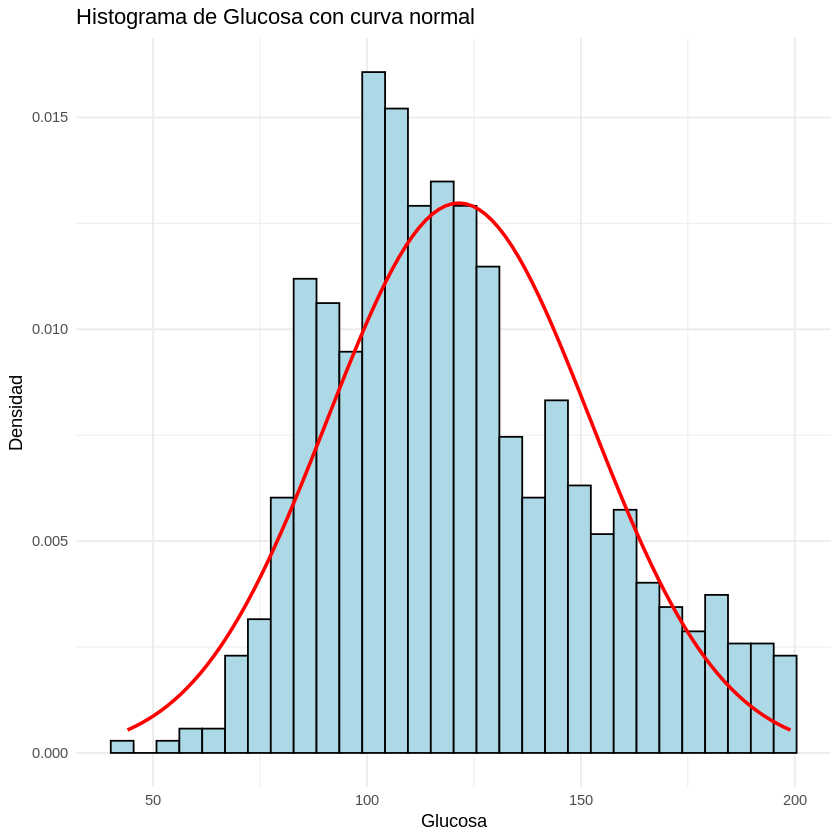

In [162]:
# ================================
# EJERCICIOS CON EL CONJUNTO DE DATOS DE DIABETES
# ================================

# Cargar librerías necesarias
# (Ya deberían estar instaladas si vienes de la sección anterior)
library(VIM)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tibble)
library(mlbench)
library(forcats)
library(janitor)





# ===================================
# EJERCICIO 1: Cargar y explorar el dataset
# ===================================
# Carga el dataset `PimaIndiansDiabetes` y explóralo con `glimpse()`

# Código base:
data(PimaIndiansDiabetes)
df <- as.data.frame(PimaIndiansDiabetes)


# TU CÓDIGO:
# glimpse( ... )

glimpse(PimaIndiansDiabetes)






# ===================================
# EJERCICIO 2: Limpieza de datos
# ===================================
# Reemplaza los valores 0 por NA en las variables: glucose, pressure y mass

# TU CÓDIGO:
df <- df %>%
  mutate(
    glucose = ifelse(glucose == 0, NA, glucose),
    pressure = ifelse(pressure == 0, NA, pressure),
    mass = ifelse(mass == 0, NA, mass),
    triceps = ifelse(triceps == 0, NA, triceps),
    insulin = ifelse(insulin == 0, NA, insulin)
  )

#lo hq ecambiado en todas las variables porque me da algún valor NA que no entiendo





# ===================================
# EJERCICIO 3: Imputación de datos con ridge
# ===================================
# Imputa los valores faltantes de las variables numéricas usando ridge regression
# Usa la función `empire::estimate_ridge`

# Selección previa:
df_numerico <- df %>% select_if(is.numeric)


# TU CÓDIGO:
df_imputado <- empire::estimate_ridge(data = df_numerico, diff = 10, ridge_alpha = 0)$new_dat






# ===================================
# EJERCICIO 4: Filtrado de mujeres embarazadas
# ===================================
# Filtra el dataset para quedarte solo con mujeres con al menos 1 embarazo

# TU CÓDIGO:
df_embarazadas <- df %>%
  filter(pregnant >=1)





# ===================================
# EJERCICIO 5: Crear variable estandarizada de BMI
# ===================================
# Crea una nueva variable `mass_z` que estandarice la variable `mass` (z-score)

# TU CÓDIGO:
df_embarazadas <- df_embarazadas %>%
  mutate(mass_z = (mass-mean(mass, na.rm=T))/sd(mass, na.rm=T))




# ===================================
# EJERCICIO 6: Estadística descriptiva de glucosa
# ===================================
# Calcula la media, mediana, desviación típica, mínimo y máximo de `glucose`

# TU CÓDIGO:
df_embarazadas %>%
  summarise(
    media = mean(glucose, na.rm = T),
    mediana = median(glucose, na.rm = T),
    sd = sd(glucose, na.rm = T),
    min = min(glucose, na.rm = T),
    max = max(glucose, na.rm = T)
  )


# ===================================
# EJERCICIO 7: Histograma con curva normal
# ===================================
# Dibuja el histograma de glucosa con densidad y superpone la curva normal teórica

# TU CÓDIGO:
ggplot(df_embarazadas, aes(x = glucose)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  stat_function(
    fun = dnorm,
    args = list(mean = mean(df_embarazadas$glucose, na.rm = TRUE), sd = sd(df_embarazadas$glucose, na.rm = TRUE)),
    color = "red",
    size = 1
  ) +
  labs(title = "Histograma de Glucosa con curva normal", x = "Glucosa", y = "Densidad")+
  theme_minimal()





# ===================================
# EJERCICIO 8: Correlación entre glucosa y masa
# ===================================
# Calcula la correlación entre `glucose` y `mass`, ignorando los NA

# TU CÓDIGO:
cor(df_embarazadas$glucose, df_embarazadas$mass, use = "complete.obs")






# ===================================
# EJERCICIO 9: Crear grupos de edad
# ===================================
# Crea una variable `grupo_edad` con cortes: [20,30), [30,40), [40,50), [50,60)

df_embarazadas <- df_embarazadas %>%
  mutate(grupo_edad = cut(age,
                          breaks = c(20, 30, 40, 50, 60),
                          right = FALSE,
                          include.lowest = FALSE,
                          labels = c("[20,30)", "[30,40)", "[40,50)", "[50,60)")))








# ===================================
# EJERCICIO 10: Tabla cruzada
# ===================================
# Crea una tabla cruzada entre `diabetes` y `grupo_edad`

# TU CÓDIGO:
table(df_embarazadas$diabetes, df_embarazadas$grupo_edad)


# ===================================
# EJERCICIO 11: Unión con tabla externa
# ===================================
# Usa la tabla `recomendaciones` para añadir una columna con la recomendación
# de salud según grupo de edad y diabetes. Usa `left_join`.

recomendaciones <- tibble(
  grupo_edad = c("[20,30)", "[30,40)", "[40,50)", "[50,60)", "[60,90)"),
  diabetes = c("pos", "neg", "pos", "neg", "pos"),
  recomendacion = c(
    "Revisión semestral",
    "Promover actividad física",
    "Controles nutricionales",
    "Revisión anual",
    "Seguimiento médico mensual"
  )
)

View(recomendaciones)

# TU CÓDIGO:
df_embarazadas <- df_embarazadas %>%
  left_join(recomendaciones, by = c("grupo_edad", "diabetes"))

# Visualizar resultado:
View(df_embarazadas)

